In [1]:
import pandas as pd
import numpy as np

from scipy.stats import skew, kurtosis

# plots and diagrams
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# for saving model
import pickle

In [2]:
# load data
# dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance
df = pd.read_csv('../data/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Exploratory data analysis
df.shape

(1338, 7)

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df_encoded = pd.get_dummies(
    df,
    columns=['children', 'sex', 'smoker', 'region']
)
df_encoded

,age,bmi,charges,children_0,children_1,children_2,children_3,children_4,children_5,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,1,0,0,0,0,0,1,0,0,1,0,0,0,1
1,18,33.770,1725.55230,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,28,33.000,4449.46200,0,0,0,1,0,0,0,1,1,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,1,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,0,0,0,1,0,0,0,1,1,0,0,1,0,0
1334,18,31.920,2205.98080,1,0,0,0,0,0,1,0,1,0,1,0,0,0
1335,18,36.850,1629.83350,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1336,21,25.800,2007.94500,1,0,0,0,0,0,1,0,1,0,0,0,0,1


## Diagrams and plots

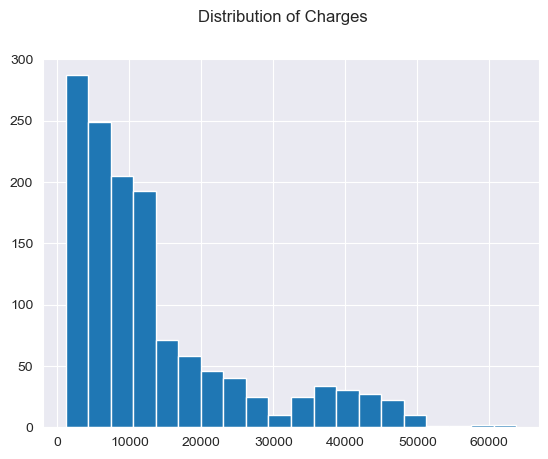

In [9]:
df_encoded['charges'].hist(bins=20)
plt.suptitle('Distribution of Charges')
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f7fd1163910>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f7fa091c910>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f7fd1163eb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f7fd1182250>}

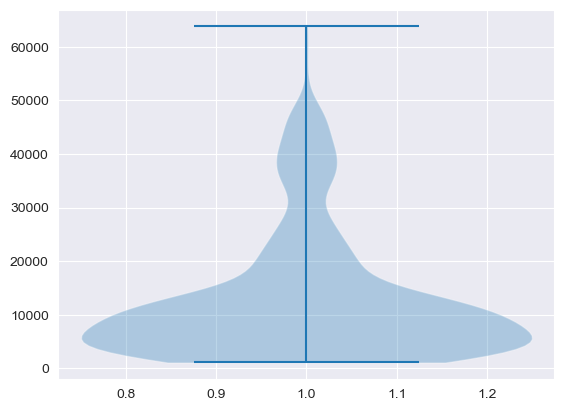

In [10]:
plt.violinplot(df_encoded['charges'])

Skewness:

Skewness measures the asymmetry of the data distribution.
If skewness is close to 0, the data is approximately symmetric.
If skewness is negative, it indicates a left-skewed (negatively skewed) distribution, where the tail on the left side is longer or fatter.
If skewness is positive, it indicates a right-skewed (positively skewed) distribution, where the tail on the right side is longer or fatter.
Interpretation:

Skewness values around -1 and 1 are often considered mildly skewed.
Skewness values less than -1 or greater than 1 are considered moderately to highly skewed.

In [11]:
skew(df_encoded['charges'])

1.5141797118745743

Kurtosis:

- Kurtosis measures the tailedness or peakedness of the data distribution.
- If kurtosis is close to 0 (e.g., 3 for a normal distribution), it indicates a mesokurtic distribution, which is neither too flat nor too peaked compared to a normal distribution.
- If kurtosis is less than 3 (negative kurtosis), it indicates a platykurtic distribution with shorter and thinner tails, which is flatter than a normal distribution.
- If kurtosis is greater than 3 (positive kurtosis), it indicates a leptokurtic distribution with longer and fatter tails, which is more peaked than a normal distribution.

Interpretation:

Kurtosis values around 0 (excess kurtosis = 0) suggest a distribution similar to a normal distribution.
Kurtosis values greater than 3 indicate heavy tails and a more peaked distribution.
Kurtosis values less than 3 indicate light tails and a flatter distribution.

In [12]:
kurtosis(df_encoded['charges'])

1.595821363956751

////Correlation Coefficient (r): The values in the cells range from -1 to 1, with:

-1 indicating a perfect negative (inverse) linear relationship.
0 indicating no linear relationship.
1 indicating a perfect positive linear relationship.
Direction of Correlation: The sign of the correlation coefficient indicates the direction of the relationship:

Positive values (close to 1) indicate a positive correlation, meaning that as one variable increases, the other tends to increase as well.
Negative values (close to -1) indicate a negative correlation, meaning that as one variable increases, the other tends to decrease.
Values close to 0 suggest little to no linear relationship.
Strength of Correlation: The magnitude of the correlation coefficient indicates the strength of the relationship. Values closer to -1 or 1 represent stronger correlations, while values closer to 0 represent weaker correlations.

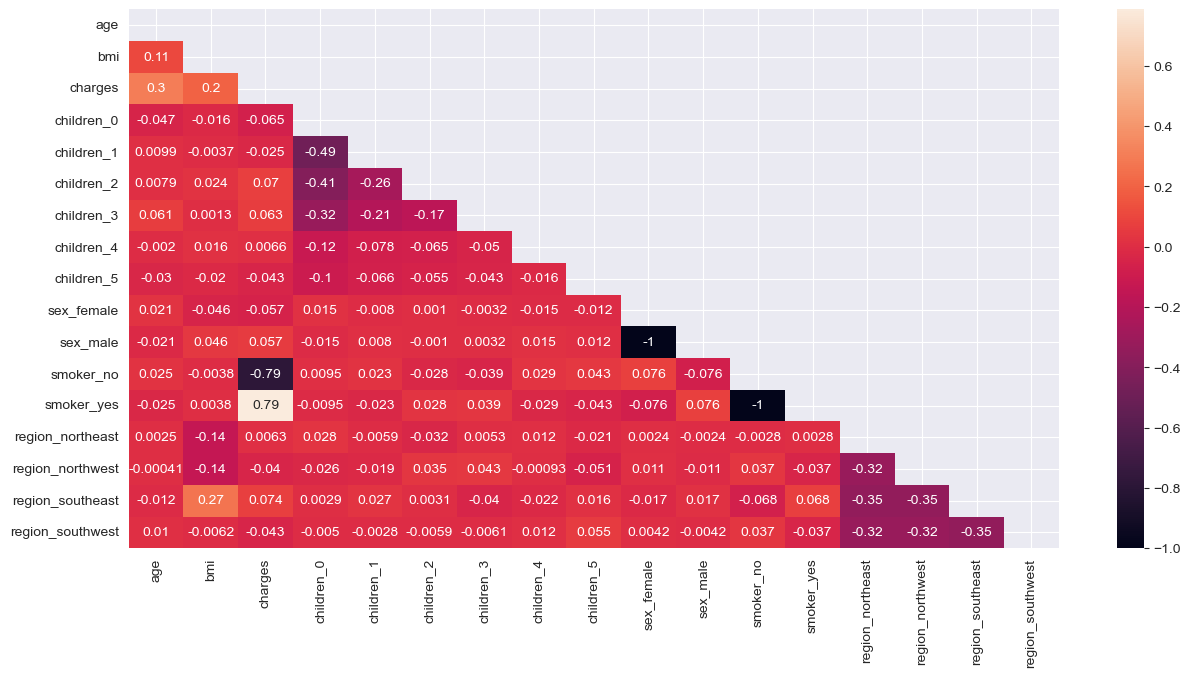

In [13]:
# Create a correlation matrix
corr_matrix = df_encoded.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the figure size
plt.figure(figsize=(15, 7))

# Create the heatmap with the mask
sns.heatmap(corr_matrix, annot=True, mask=mask)

# Display the plot
plt.show()

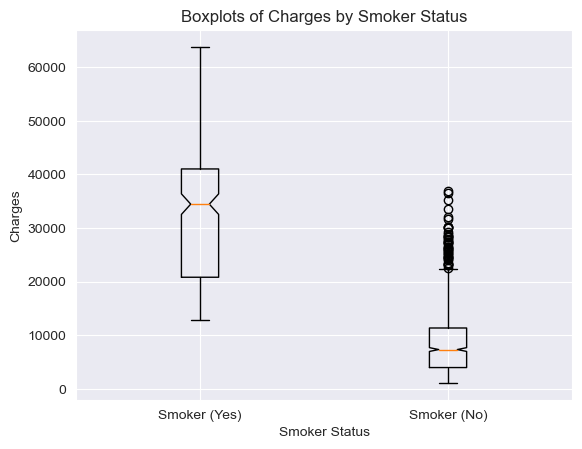

In [14]:
# Create two subsets of data: one for smoker_yes and one for smoker_no
data_smoker_yes = df_encoded[df_encoded['smoker_yes'] == 1]
data_smoker_no = df_encoded[df_encoded['smoker_no'] == 1]

# Create a figure and axis
fig, ax = plt.subplots()

# Create boxplots for each subset
boxplot_data = [data_smoker_yes['charges'], data_smoker_no['charges']]
labels = ['Smoker (Yes)', 'Smoker (No)']

ax.boxplot(boxplot_data, labels=labels, notch=True)

# Add labels and title
ax.set_xlabel('Smoker Status')
ax.set_ylabel('Charges')
ax.set_title('Boxplots of Charges by Smoker Status')

# Show the plot
plt.show()

## Train model

In [15]:
X = df_encoded.drop('charges',axis=1) # Independet variable
Y = df_encoded['charges'] # dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

### Mean Absolute Error (MAE):

**Definition:** MAE is a measure of the average absolute differences between predicted values and actual values in a dataset.

**Interpretation:** MAE represents the average magnitude of errors made by the model in its predictions. It provides a simple and intuitive measure of model accuracy. A lower MAE indicates that the model's predictions are closer to the actual values on average.


### Mean Squared Error (MSE):

**Definition:** MSE is a measure of the average of the squared differences between predicted values and actual values.

**Interpretation:** MSE quantifies the average magnitude of squared errors. Unlike MAE, MSE penalizes larger errors more heavily because it squares the differences. It is useful for understanding the spread of errors. Smaller MSE values indicate that the model's predictions are closer to the actual values.


### R-squared (Coefficient of Determination):

**Definition:** R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (the target) that is predictable from the independent variables (the features) in a regression model.

**Interpretation:** R-squared ranges from 0 to 1, with higher values indicating a better fit of the model to the data. Here's how to interpret it:

- R-squared = 0: The model explains none of the variance in the target variable. It doesn't fit the data.
- R-squared = 1: The model perfectly explains the variance in the target variable. It's an ideal fit.
- 0 < R-squared < 1: The model explains a portion of the variance in the target variable. The closer R-squared is to 1, the better the model fits the data.


In [16]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test.to_numpy(), y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test.to_numpy(), y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (Coefficient of determination)
r2 = r2_score(y_test.to_numpy(), y_pred)
print("R-squared:", r2)

Mean Absolute Error: 4214.909953083681
Mean Squared Error: 33756429.70235286
R-squared: 0.7825655038982293


In [17]:
# save model for future usages
with open('linear_regression_model.pkl', 'wb') as f:
        pickle.dump(model, f)

In [18]:
# load model
with open('linear_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)